In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
data_test = pd.read_csv("test.csv")

In [8]:
data_train = pd.read_csv("train.csv")

In [9]:
print("Amount of columns and rows in data_test",data_test.shape)
print("Amount of columns and rows in data_train",data_train.shape)

Amount of columns and rows in data_test (418, 11)
Amount of columns and rows in data_train (891, 12)


In [10]:
data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
808,809,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S


In [11]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
print ("Missings in the train data: ")
display(data_train.isnull().sum())
print ("Missings in the test data: ")
display(data_test.isnull().sum())

Missings in the train data: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missings in the test data: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
data_all = pd.concat([data_train, data_test], sort = True).reset_index(drop=True)

In [15]:
print ("Missings for Age in the data: " + str(data_all['Age'].isnull().sum()))
print("Missings in percentage: " + str(data_all['Age'].isnull().sum()/len(data_all)*100) + "%")

Missings for Age in the data: 263
Missings in percentage: 20.091673032849503%


In [16]:
import seaborn as sns

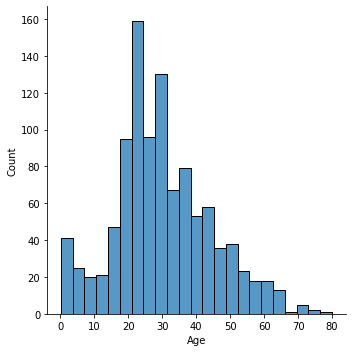

In [17]:
sns.displot(data_all['Age'], kde =False)

In [18]:
print ('Median for Age separeted by Pclass:')
display(data_train.groupby('Pclass')['Age'].median())
print ('Median for Age separeted by Pclass and Sex:')
display(data_train.groupby(['Pclass','Sex'])['Age'].median())

Median for Age separeted by Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age separeted by Pclass and Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [19]:
data_all['Age'] = data_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [20]:
display(data_all.isnull().sum())

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [21]:
data_all.loc[data_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [22]:
thomas = data_all.loc[(data_all['Pclass']==3)&(data_all['SibSp']==0)&(data_all['Embarked']=='S')]['Fare'].median()
print(thomas)
data_all.loc[data_all['Fare'].isnull(), 'Fare'] = thomas

7.925


In [23]:
display(data_all.isnull().sum())

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [24]:
display(data_train['Cabin'].unique())
print('There are ' + str(data_train['Cabin'].nunique())+' different values for Cabin and '+ str(data_train['Cabin'].isnull().sum())+ ' cases are missing')

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

There are 147 different values for Cabin and 687 cases are missing


In [25]:
data_all['Deck'] = data_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

Surivval rates for different cabines


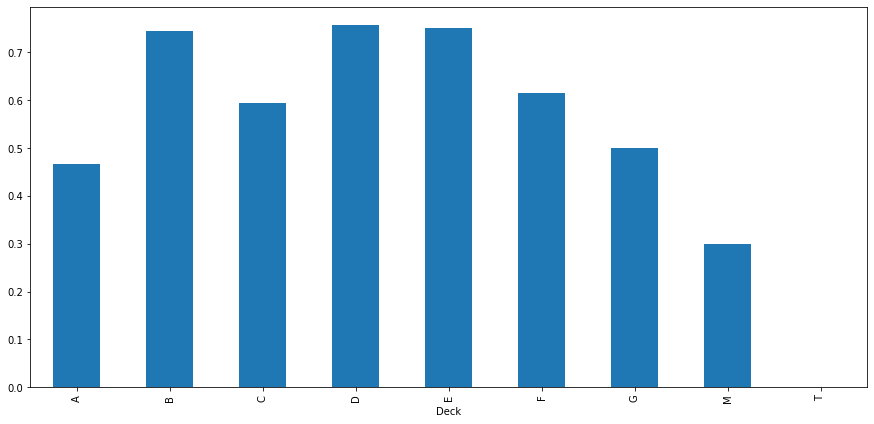

In [26]:
data_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind ='bar',figsize=(15,7))
print("Surivval rates for different cabines")

In [27]:
idx = data_all[data_all['Deck'] == 'T'].index
data_all.loc[idx, 'Deck'] = 'A'
data_all['Deck']=data_all['Deck'].replace(['A','B','C'],'ABC')
data_all['Deck']=data_all['Deck'].replace(['D','E'],'DE')
data_all['Deck']=data_all['Deck'].replace(['F','G'],'FG')

In [28]:
data_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [29]:
data_all.loc[data_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


In [30]:
data_all.loc[(data_all['Pclass'] ==1)&(data_all['Fare'] <=80)&(data_all['Deck'] =='ABC')]['Embarked'].value_counts()

S    50
C    42
Name: Embarked, dtype: int64

In [31]:
data_all.loc[data_all['Embarked'].isnull(),'Embarked']='S'

In [32]:
display(data_all.isnull().sum())

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

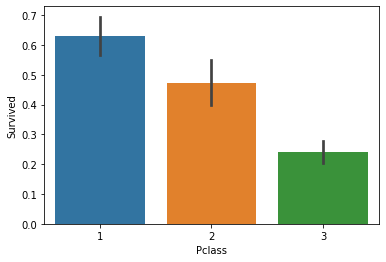

In [33]:
sns.barplot(x='Pclass', y='Survived', data=data_train)

In [34]:
from matplotlib import pyplot as plt

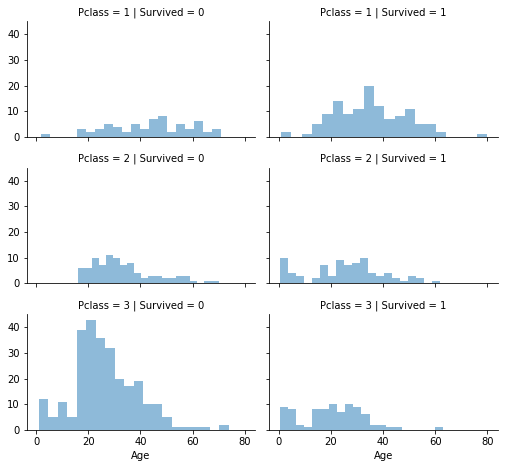

In [35]:
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<AxesSubplot:>

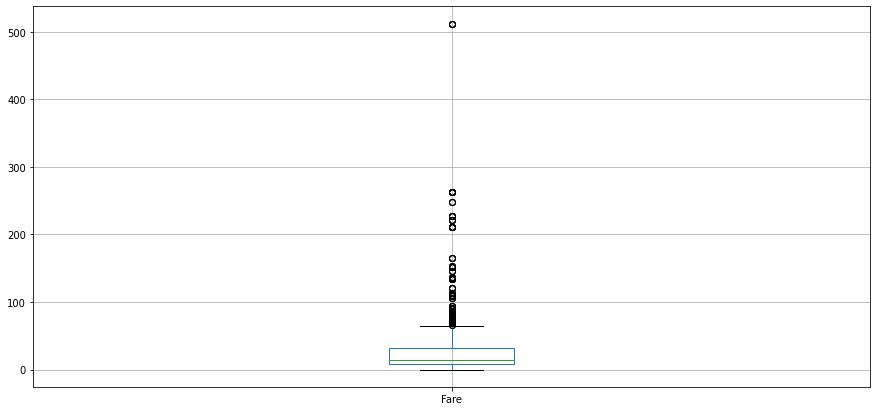

In [36]:
data_all.boxplot(column=['Fare'],figsize=(15,7))

<AxesSubplot:>

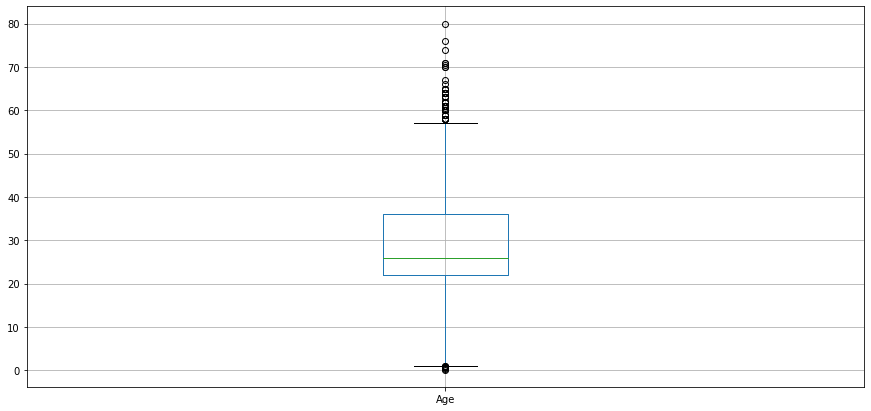

In [37]:
data_all.boxplot(column=['Age'],figsize=(15,7))

In [40]:
title_names = (data_all['Title'].value_counts()<10)
data_all['Title'] =data_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] ==True else x)
data_all.groupby('Title')['Title'].count()

Title
Master     61
Misc       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

In [41]:
data_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,Mr


In [46]:
prepared_data_test = data_test
prepared_data_train = data_train


ps_id_test = prepared_data_test["PassengerId"]
prepared_data_train.drop(columns={"Cabin","Ticket","PassengerId"},inplace=True)
prepared_data_test.drop(columns={"Cabin","Ticket","PassengerId"},inplace=True)

In [47]:
categorical_features = ["Name", "Embarked", "Sex", "SibSp", "Parch"]
numerical_features = ["Age", "Fare"]

In [48]:
selected_features =  numerical_features + categorical_features

In [49]:
def extract_prefixes(data):
    prefixes = {
    "Capt": "Сrew",
    "Col": "Сrew",
    "Major": "Сrew",
    "Jonkheer": "VIP",
    "Don": "VIP",
    "Sir" : "VIP",
    "Dr": "Сrew",
    "Rev": "Сrew",
    "the Countess":"VIP",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "VIP"
    }
    
    for i in range(len(data)):
        cur_name = data[i]
        
        for prefix in prefixes.keys():
            if prefix in cur_name:
                cur_name = prefixes[prefix]
                break
                
        data[i] = cur_name
        
    return data

In [50]:
def uniques(column):
    uniques_set = set()
    for val in column:
        uniques_set.add(val)
            
    return uniques_set

In [51]:
prepared_data_train["Name"] = extract_prefixes(prepared_data_train["Name"])
prepared_data_test["Name"] = extract_prefixes(prepared_data_test["Name"])

print(prepared_data_test.shape)
print(prepared_data_train.shape)
print(prepared_data_test.select_dtypes("object").apply(pd.Series.nunique, axis=0))
print(prepared_data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0))

<ipython-input-49-c87d6777763d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = cur_name


(418, 8)
(891, 9)
Name        5
Sex         2
Embarked    3
dtype: int64
Name        6
Sex         2
Embarked    3
dtype: int64


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', StandardScaler())
        ]
)

categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


prepr = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)

In [53]:
print(prepared_data_train.dtypes)
print(prepared_data_test.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [55]:
TARGET = prepared_data_train["Survived"]

In [56]:
def transform(data):
    prepr.fit(data)
    return prepr.transform(data)

train_x = transform(prepared_data_train)
test_x = transform(prepared_data_test)

train_y = TARGET

print(f"trainX:",train_x.shape)
print(f"testX:",test_x.shape)

print(f"trainY:",train_y.shape)
print()

trainX: (891, 28)
testX: (418, 27)
trainY: (891,)



In [57]:
ALL_DATA = prepared_data_test.append(prepared_data_train)
ALL_DATA.shape

ALL_X = transform(ALL_DATA)

In [60]:
from sklearn.preprocessing import LabelEncoder

def plot_cluster(data, labels):
    plt.scatter(data[:,0],data[:,1], c=labels, cmap='rainbow')

from sklearn.manifold import TSNE
train_x_clust = train_x
test_x_clust = test_x

prepared_data_train["Survived"]  = data_train["Survived"]

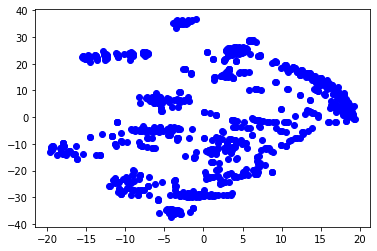

In [61]:
perplexity_tsne = 45

tsne = TSNE(perplexity=perplexity_tsne, n_iter=5000, random_state=30)

tsne_representation = tsne.fit_transform(train_x_clust)

plot_cluster(tsne_representation, "blue")

In [62]:
from sklearn.cluster import KMeans

def kmeans(folded_repr, clusters, return_preds=False):
   # 'k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    kmeans = KMeans(algorithm='elkan', init='k-means++', max_iter=1000,
    n_clusters=clusters,
    random_state=None, verbose=0)
    labels = kmeans.fit(folded_repr).labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return kmeans.fit_predict(folded_repr)

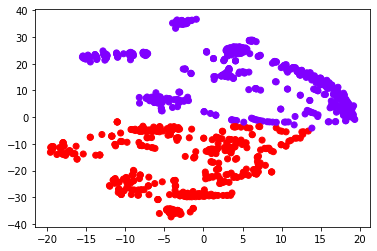

In [63]:
predictions = kmeans(tsne_representation,2, True)
prepared_data_train["pred"] = predictions

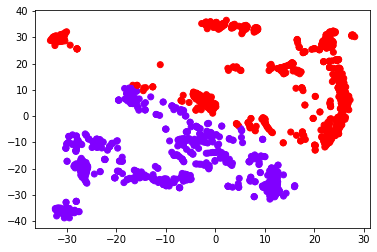

In [64]:
tnse_all_x_repr = tsne.fit_transform(ALL_X)
kmeans(tnse_all_x_repr,2)

In [65]:
from sklearn.cluster import DBSCAN

def dbscan(folded_repr, eps_, return_preds=False):
    # eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    db = DBSCAN(eps=eps_, min_samples=2)
    db.fit(folded_repr)
    labels = db.labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return db.fit_predict(folded_repr)

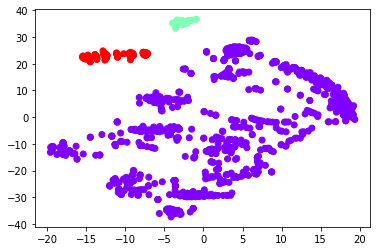

In [66]:
predictions = dbscan(tsne_representation,6, True)
prepared_data_train["pred"] = predictions

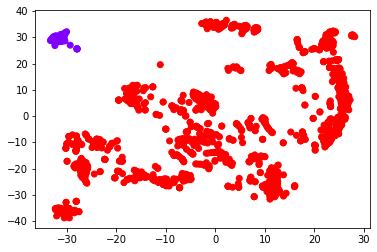

In [67]:
dbscan(tnse_all_x_repr,14)